# CS114.L21 - MÁY HỌC - MACHINE LEARNING
1. YÊU CẦU:
Cho dataset có sẵn (data2.csv)
Xây dựng model từ dataset có sẵn để dự đoán các dataset khác (data3.csv, data4.csv) sao cho sai số càng nhỏ càng tốt


In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import svm
from google.colab import drive
#link googledriver https://drive.google.com/drive/folders/1YJotQLPeEk5M77YmhVWcn98r8NyvZ7BD?usp=sharing
drive.mount('/content/gdrive') 
# Đọc dữ liệu từ google drive
path_data2 = '/content/gdrive/MyDrive/data_cs114/dataset2.txt'
path_data3 = '/content/gdrive/MyDrive/data_cs114/dataset3.txt'
path_data4 = '/content/gdrive/MyDrive/data_cs114/dataset4.txt'

Mounted at /content/gdrive


In [6]:
clf = linear_model.LinearRegression(fit_intercept=True)
#clf = svm.SVR()
# from sklearn import tree
# clf = tree.DecisionTreeRegressor()

In [7]:
def read_data(path_data):
  f = open(path_data, encoding= 'utf-8')
  data = f.read()
  return data
def transform(data):
  lst1 = []
  lst2 = []
  lst = data.split('\n')
  for i in lst:
    z = i.strip().split(',')
    x = float(z[0])
    y = float(z[1])
    z= [x]
    z.append(x)
    lst1.append(z)
    lst2.append(y)
  return lst1, lst2



In [8]:
x_train, y_train = transform(read_data(path_data2))
x_test1 ,y_test1 = transform(read_data(path_data3))
x_test2 ,y_test2 = transform(read_data(path_data4))

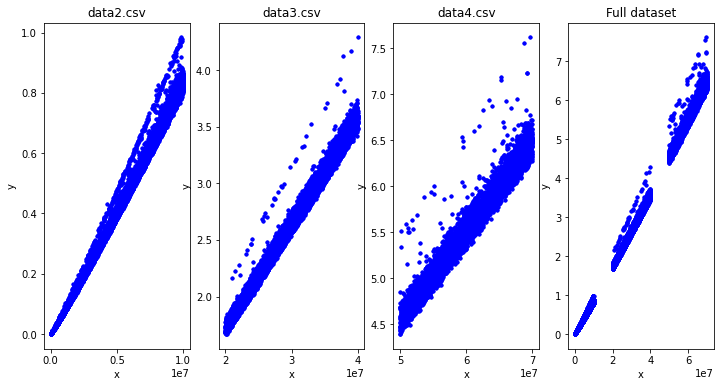

In [9]:
# Mô hình hóa dữ liệu bằng thư viện matplotlib.pyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# data2.csv
plt.subplot(1, 4, 1)
plt.plot(x_train, y_train, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data2.csv')

# data3.csv
plt.subplot(1, 4, 2)
plt.plot(x_test1, y_test1, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data3.csv')

# data4.csv
plt.subplot(1, 4, 3)
plt.plot(x_test2, y_test2, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('data4.csv')

# Full Dataset
plt.subplot(1, 4, 4)
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test1, y_test1, 'b.')
plt.plot(x_test2, y_test2, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Full dataset')
plt.show()

In [10]:
#Xây dựng mô hình Lỉnearregression
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predict1 = clf.predict(x_test1)
predict2 = clf.predict(x_test2)
predict0 = clf.predict(x_train)

In [12]:
print(mean_squared_error(y_train, predict0))
print(mean_squared_error(y_test1, predict1))
print(mean_squared_error(y_test2, predict2))

0.00014337728721748838
0.02066494939754898
0.22348476817425955


x*log(x)

In [13]:
#tối ưu:
import math
import numpy as np
def new_x(x):
  return x * np.log(x)

In [16]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(new_x(x_train), y_train)
predict1 = clf.predict(new_x(x_test1))
predict2 = clf.predict(new_x(x_test2))
predict0 = clf.predict(new_x(x_train))
print(mean_squared_error(y_train, predict0))
print(mean_squared_error(y_test1, predict1))
print(mean_squared_error(y_test2, predict2))

0.00012203439798746088
0.005344034781897087
0.019834206179683376


In [17]:
def new_x(x):
  return np.sqrt(x)

In [19]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(new_x(x_train), y_train)
predict1 = clf.predict(new_x(x_test1))
predict2 = clf.predict(new_x(x_test2))
predict0 = clf.predict(new_x(x_train))
print(mean_squared_error(y_train, predict0))
print(mean_squared_error(y_test1, predict1))
print(mean_squared_error(y_test2, predict2))

0.002962983823618142
1.5021666366531905
11.13702457118678


Sau khi kiểm thử trên nhiều feature (x, xlog(x), sqrt(x)) nhóm chúng em nhận thấy với x = xlog(x) thì module dự đoán tốt nhất.